# Анализ продаж игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**План работы:**
- подготовка данных
- исследовательский анализ данных
- составление портрета пользователя
- проверка гипотез 

## Открыть файл с данными и изучить его

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нашей таблице 10 столбцов и 16715 строк. Сразу заметно большое кол-во пропусков и не соответствующие типы данных в некоторых столбцах

## Подготовка данных

**Замените названия столбцов (приведите к нижнему регистру)**

In [5]:
games.columns = games.columns.str.lower()

In [6]:
# заменим тип данных в столбцах дата, оценка пользователей

games['year_of_release'] = games['year_of_release'].astype('Int64')

Мы знаем по ТЗ, что в столбце "оценка пользователей" встречается абревитура tbd, поэтому прежде чем менять тип данных столбца, нужно избавиться от этого. tbd - To Be Decided или To Be Determined, то есть на момент выгрузки данных оценки пользователей неизвестны / не определены. Можно заменить это на Nan

In [7]:
games['user_score'] = pd.to_numeric(games['user_score'], errors= 'coerce')

In [8]:
# Оценки пользователей приведем к типу float
games['user_score'] = games['user_score'].astype(float)

**Дубликаты**

In [9]:
games.duplicated().sum()

0

In [10]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
games['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [14]:
games['name'] = games['name'].str.lstrip() #избавимся от пробелов в начале названий игр

Явных дубликатов в таблице нет, а в столбцах, предполагающих уникальные значения, повторений и опечаток нет

**Пропуски:**

In [15]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

- есть 2 пропуска в столбцах имя и жанр, посмотрим на них

In [16]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки можно удалить, так как их всего 2 и избавиться от этих пропусков мы не можем

- 269 пропусков в столбце "год выпуска". Это чуть больше 1% от всех данных и так как заменить их мы не можем, то удалим их. 

In [17]:
games = games.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)

In [18]:
games 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Большое количество пропусков в столбцах с оценками и рейтингом. Не думаю, что их нужно заменять средними значениями, т.к. это исказит результаты, и избавляться от этих строк не стоит, т.к. это почти половина всех данных. Оставим, как есть 

**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [19]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы.

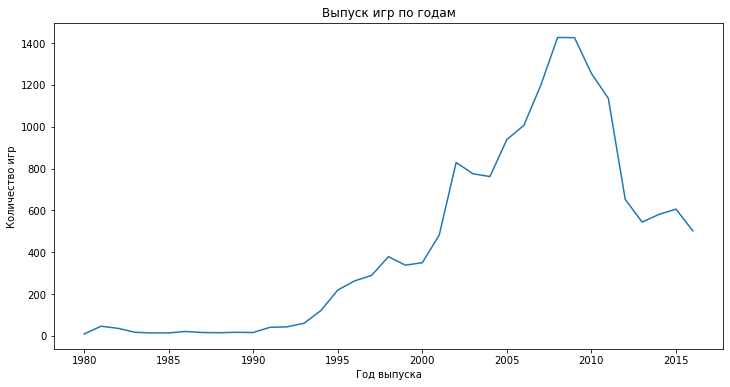

In [20]:
g_year = games.groupby('year_of_release').agg({'name':'count'})


plt.figure(figsize = (12,6))
plt.plot(g_year)
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

По графику видно, что рост числа выпускаемых игр начался около 1995 и продолжался до 2009-2010 годов. Это объясняется активным развитием индустрии, большим вниманием к ней, создавалось большое количество движков для игр(в сравнении с периодом после 2010). Падение количества выпускаемх игр можно объяснить кризисом 2008 года, имеющим долговременные последствия для индустрии; также примерно в этот период начали активнее развиваться мобильные игры, а они не включены в наши данные; в этот же период популяризировались игры free to play, из-за подорожания стомости игры (которые также не включены в наши данные). Также снижение кол-ва игр, возможно, связано с повышенными требованиями к ним со стороны потребителей +с новым поколением платформ игры становится делать дороже.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

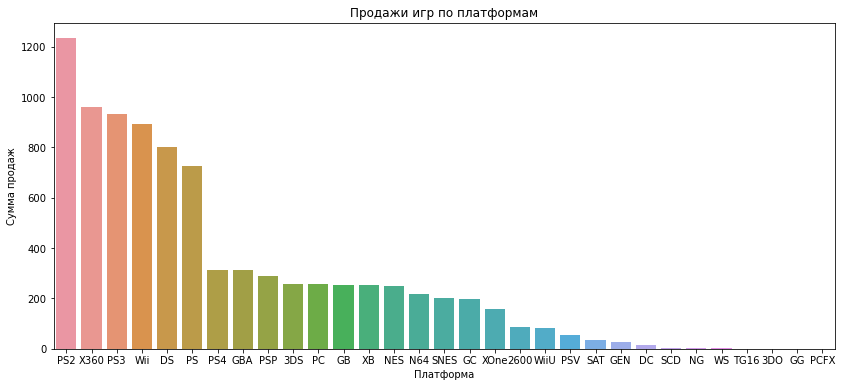

In [21]:
g_plat = games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x=g_plat['platform'], y=g_plat['total_sales'])
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж');

У нас есть явные лидеры по продажам, 3 платформы из которых семейства PS. Посмотрим распределение их продаж по годам

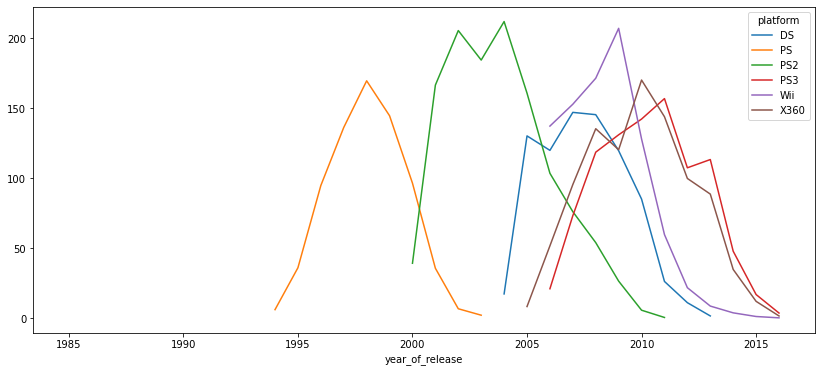

In [22]:
top = g_plat[:6]
top_l =  list(top['platform'])

top_games = games.query('platform == @top_l')

pivot = top_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

pivot.plot(figsize=(14,6));

Судя по графику топовых по продажам платформ, срок их жизни около 10 лет. 

За актуальный период возьмем период с 2013 года.
В этот год вышли платформы (PS4, XOne), которые в 2017 году, скорее всего, продолжат существовать. Выход этих платформ посспособствовал небольшому увеличению числа проданных игр после долгого падения (которое не исправил выход других платформ в 2011 году)

In [23]:
actual = games.query('year_of_release >= 2015', engine='python')
actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16428,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [24]:
g_act = actual.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()
g_act

,platform,total_sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42
5,PC,13.77
6,X360,13.48
7,PSV,10.50
8,Wii,1.32
9,PSP,0.12


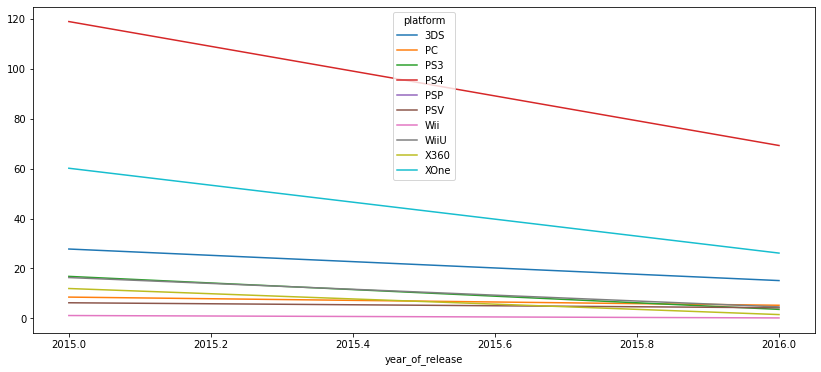

In [25]:
a_pivot = actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

a_pivot.plot(figsize=(14,6));

По графику видно, что по продажам лидируют вышедшие в 2013 году PS4 и XOne, но в рассматриваемый период продажи на них упали, примерно в 1,5 раза. Роста продаж игр для других платформ также не наблюдается. 3 место по продажам занимают игры для платформы 3DS. Их продажи сильно ниже, чем для двух других платформ, но достаточно стабильны, такого резкого снижения нет. 

Потенциально прибыльными являются указанные выше платформы, т.к. они еще долгое время будут на рынке. И если смотреть на предыдущие графики по продажам по платформам в целом, то видно, что в топе -  различные версии PS и предыдущая версия Xbox - X360, что говорит об их популярности и доверии пользователей. Вероятные, новые поколения этих платформ будут также популярны. 

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. Соотнесите выводы с продажами игр на других платформах.

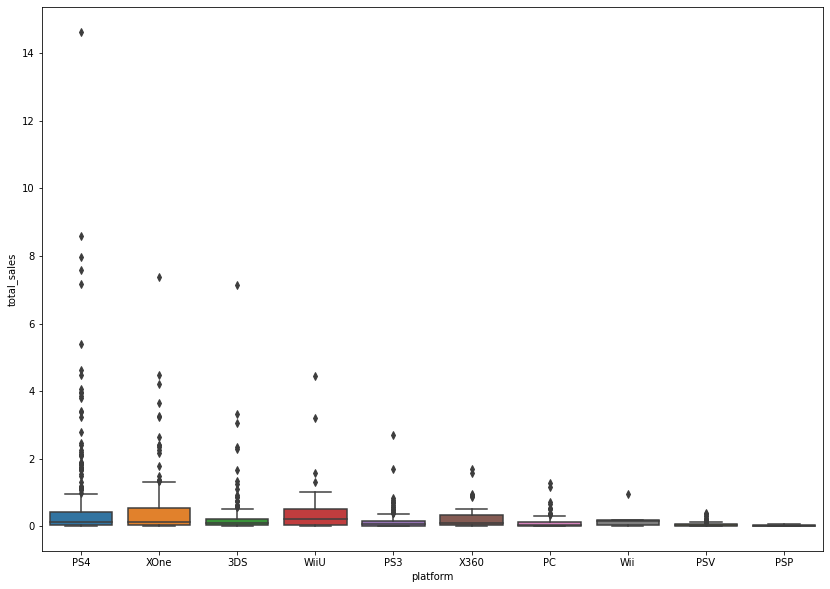

In [26]:
plt.figure(figsize=(14,10))
sns.boxplot(data=actual, x='platform', y='total_sales');

Видим, что много выбросов, поэтому избавимся от них

In [27]:
actual_x = actual.query('total_sales <= 1.5')
actual_x

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1261,Batman: Arkham Knight,XOne,2015,Action,0.88,0.47,0.00,0.14,85.0,6.6,M,1.49
1262,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,NaN,NaN,NaN,1.49
1387,Mortal Kombat X,XOne,2015,Fighting,1.03,0.21,0.00,0.14,86.0,7.3,M,1.38
1389,Rise of the Tomb Raider,XOne,2015,Adventure,0.55,0.70,0.02,0.11,86.0,8.0,M,1.38
1425,Gears of War 4,XOne,2016,Shooter,0.78,0.44,0.00,0.12,84.0,6.2,M,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...
16428,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


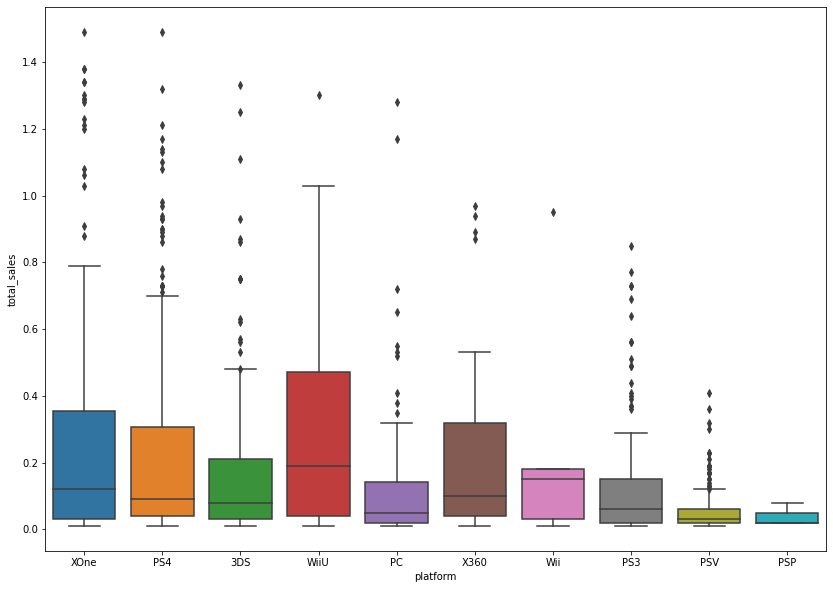

In [28]:
plt.figure(figsize=(14,10))
sns.boxplot(data=actual_x, x='platform', y='total_sales');

По графику мы видим как отличаются медианы по платформам: у psv и psp они минимальны. И так же видно, насколько большой размах продаж у приставок XOne, WiiU, PS4. Учитывая предущий график с выбросами, можно сказать, что у остальных платформ разброс данных меньше, что говорит о стабильно невысоких продажах в сравнении с другими платформами, тогда как у вышеназванных бывают игры, которые "выстреливают"

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

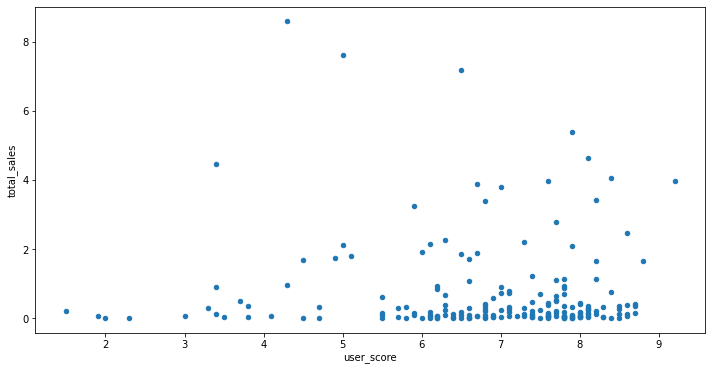

In [29]:
ps = actual[actual['platform'] == "PS4"]

ps.plot(kind='scatter', x='user_score', y='total_sales', figsize=(12,6));

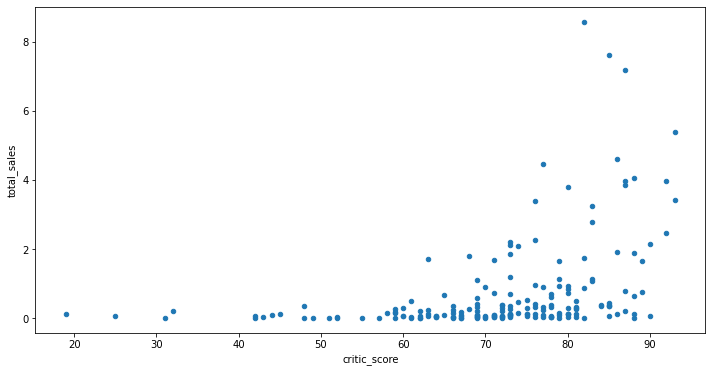

In [30]:
ps.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(12,6));

In [31]:
print('Корреляция между отзывами критиков и продажами:', ps['total_sales'].corr(ps['critic_score']))
print('Корреляция между отзывами пользователей и продажами:', ps['total_sales'].corr(ps['user_score']))

Корреляция между отзывами критиков и продажами: 0.3928485555130601
Корреляция между отзывами пользователей и продажами: -0.05973845712638215


Таким образом, в рамках рассмотрения одной платформы, можно сказать, что отзывы критиков оказывают большее влияние на продажи игр, чем отзывы пользователей. Можно предположить, что непопулярность некоторых игр и на других платформах также связана с тем, что либо критики оценили их недостаточно высоко, либо не оценили вовсе, а для многих пользователей это важный фактор.

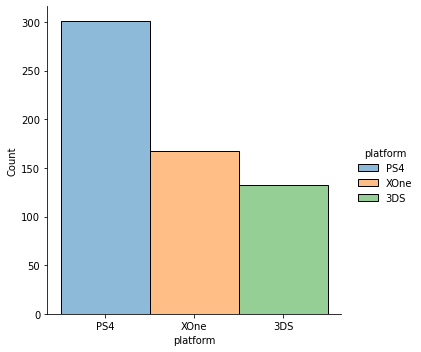

In [32]:
top = actual.query('platform == "PS4" or platform == "XOne" or platform == "3DS"')
sns.displot(top,x='platform', hue='platform');

По Количеству выпускаемых игр, платформа PS4 сильно лидирует в сравнении с двумя другими 

In [33]:
a=top.pivot_table(index='platform', values=['user_score', 'critic_score'], aggfunc='median').reset_index()
a

,platform,critic_score,user_score
0,3DS,72.0,7.50
1,PS4,73.0,7.15
2,XOne,76.0,6.70


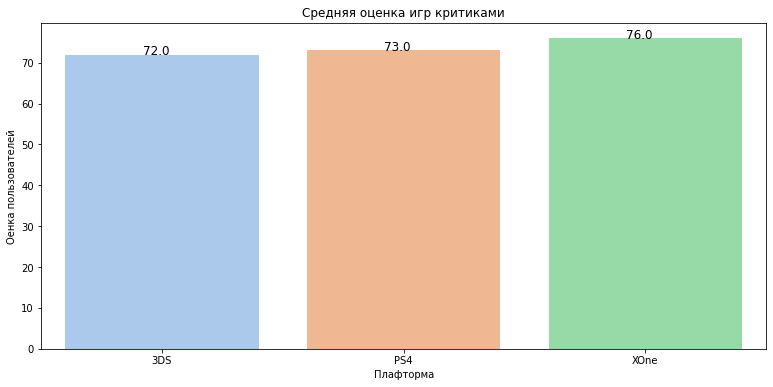

In [34]:
plt.figure(figsize =(13,6))
g = sns.barplot(data=a, x='platform', y='critic_score', palette='pastel')
for p in g.patches:
    height = p.get_height() 
    g.text(y = height+0.03, 
    x = p.get_x()+p.get_width()/2.5, 
    s = '{:.1f}'.format(height), 
    fontsize = 12 )
    
plt.title('Средняя оценка игр критиками')
plt.xlabel('Плафторма')
plt.ylabel('Оенка пользователей');

В среднем игры для XOne критиками оцениваются выше, чем для других платформ. Но разница не очень большая 

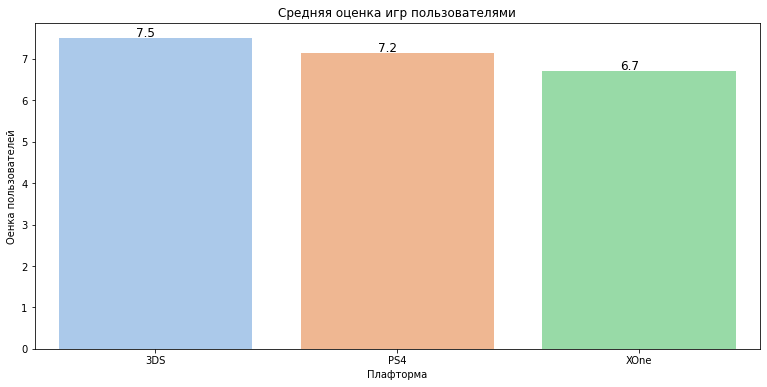

In [35]:
plt.figure(figsize =(13,6))
g = sns.barplot(data=a, x='platform', y='user_score', palette='pastel')
for p in g.patches:
    height = p.get_height() 
    g.text(y = height+0.04, 
    x = p.get_x()+p.get_width()/2.5, 
    s = '{:.1f}'.format(height), 
    fontsize = 12 )
    
plt.title('Средняя оценка игр пользователями')
plt.xlabel('Плафторма')
plt.ylabel('Оенка пользователей');

Пользователями же выше оценивают игры для консоли 3DS. Наименьшая оценка у игр для XOne

<Figure size 432x288 with 0 Axes>

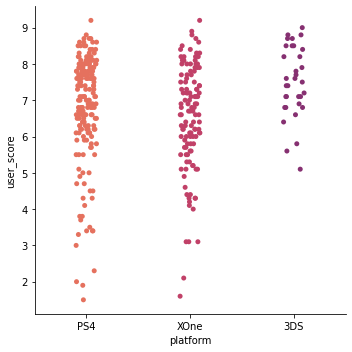

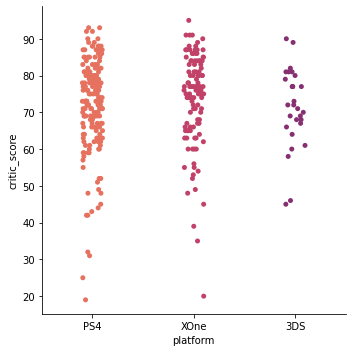

In [36]:
fig = plt.figure()

t= sns.catplot(x="platform", y="user_score", palette="flare", data=top)
t1 = sns.catplot(x="platform", y="critic_score", palette="flare", data=top)

plt.show()

По распределнию оценок видно, что у игр на 3DS нет таких низких оценок, как у других платформ. Минимальная оценка пользователями выше 5, а критиками - выше 40. 

In [37]:
xo = actual[actual['platform'] == "XOne"]
print('Корреляция между отзывами критиков и продажами:', xo['total_sales'].corr(xo['critic_score']))
print('Корреляция между отзывами пользователей и продажами:', xo['total_sales'].corr(xo['user_score']))

Корреляция между отзывами критиков и продажами: 0.430888745821368
Корреляция между отзывами пользователей и продажами: -0.04146733387366271


In [38]:
ds = actual[actual['platform'] == "3DS"]
print('Корреляция между отзывами критиков и продажами:', ds['total_sales'].corr(ds['critic_score']))
print('Корреляция между отзывами пользователей и продажами:', ds['total_sales'].corr(ds['user_score']))

Корреляция между отзывами критиков и продажами: 0.17757455046092874
Корреляция между отзывами пользователей и продажами: 0.19879627008102985


Как и у PS4, у XOne есть корреляция между оценками критиков и продажами игр умеренная, а оценки пользователей не влияют на продажи игр.
Касаемо платформы 3DS, уровни корреляции продаж с оценками критиков и оценками пользователями одинаково низки, но заметна существенная разница с другими платформами 

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0, 0.5, 'Сумма продаж')

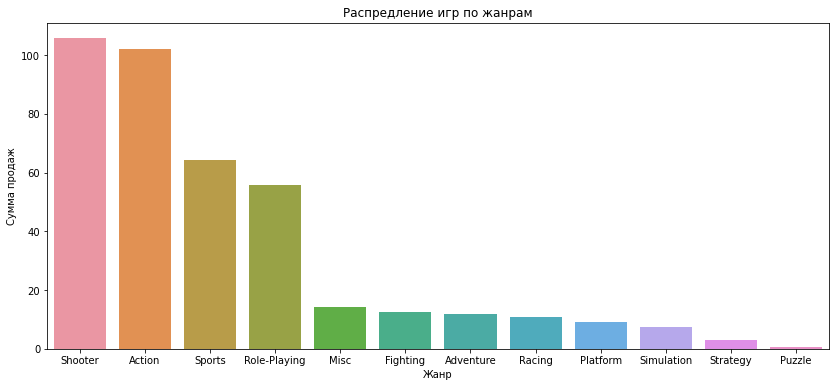

In [39]:
genre = actual.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x=genre['genre'], y=genre['total_sales'])
plt.title('Распредление игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')

Наиболее популярные жанры - шутер и экшен. Менее популярные - симуляция, стратегия и пазлы. Учитывая, что количество консольных игр сильно больше, чем игр для ПК, популярность этих жанров логична, т.к. это подходящий для них жанр. Реализовать стратегические игры на них сложнее, как и играть в них. 

### Вывод

В ходе анализа данных мы выяснили, что в настоящий момент наблюдается снижение количества выпускаемых игр, что связано с различными причинами. Больше всего игр продано на консоль PS2, что неудивительно, ведь она является самой популярной консолью. На другие поколения PS, Xbox и DS игр продавалось тоже сильно больше, в сравнении с другими платформами. Рассмотрев распредление продаж игр по годам мы выяснили, что срок жизни платформ около 10 лет. За актуальный период мы взяли данные с 2015 года. Также мы выяснили, что отзывы критиков влияют на продажи сильнее, чем отзывы пользователей. Наиболее популярными жанрами являются шутер и экшен, менее популрнями - стратегии и пазлы. 

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [40]:
region = actual.pivot_table(index='platform', 
                            values=['na_sales', 'eu_sales', 'jp_sales'],
                            aggfunc='sum')

region                          

,eu_sales,jp_sales,na_sales
platform,,,
3DS,7.39,23.55,10.31
PC,9.10,0.00,3.72
PS3,7.30,4.97,5.66
PS4,83.54,12.05,63.86
PSP,0.00,0.12,0.00
PSV,1.08,8.41,0.54
Wii,0.73,0.00,0.49
WiiU,6.49,4.12,8.86
X360,4.21,0.00,8.05


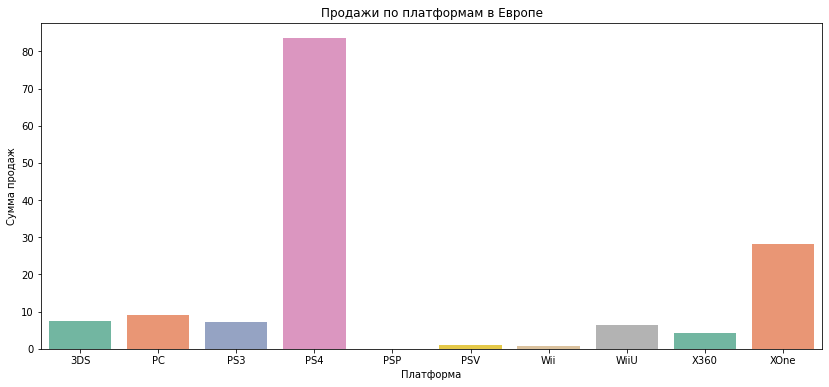

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(x=region.index, y=region['eu_sales'], palette='Set2')
plt.title('Продажи по платформам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж');

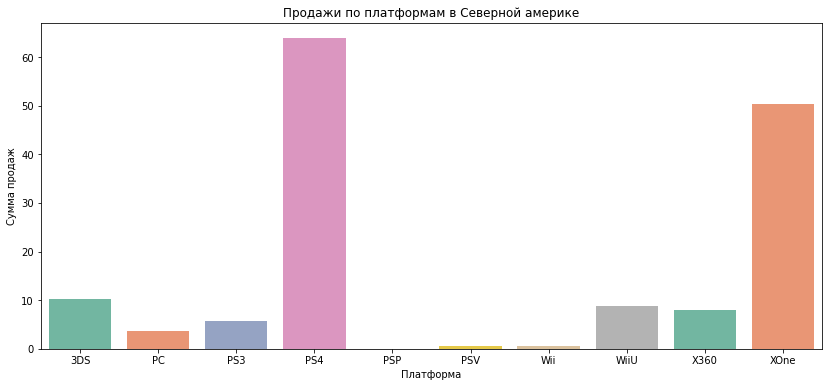

In [42]:
plt.figure(figsize=(14,6))
sns.barplot(x=region.index, y=region['na_sales'], palette='Set2')
plt.title('Продажи по платформам в Северной америке')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж');

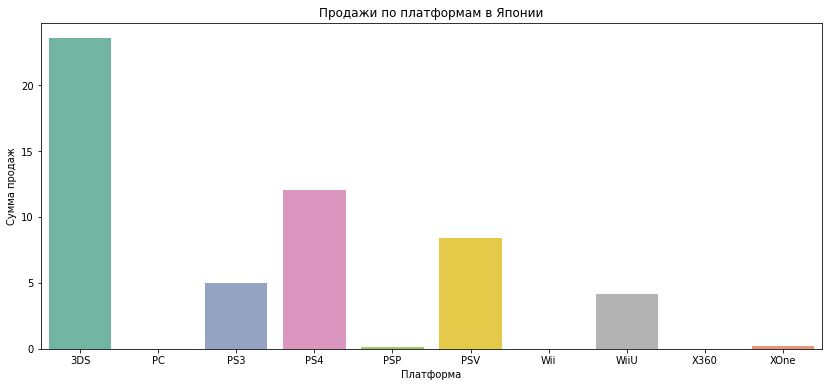

In [43]:
plt.figure(figsize=(14,6))
sns.barplot(x=region.index, y=region['jp_sales'], palette='Set2')
plt.title('Продажи по платформам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж');

In [44]:
#region.plot(kind='barh', figsize=(12,8))

In [45]:
print('Топ 5 популярных платформ в Европе:', ', '.join(list(region.sort_values(by='eu_sales', ascending=False)[:5].index)))
print('Топ 5 популярных платформ в Японии:', ', '.join(list(region.sort_values(by='jp_sales', ascending=False)[:5].index)))
print('Топ 5 популярных платформ в Северной Америке:', ', '.join(list(region.sort_values(by='na_sales', ascending=False)[:5].index)))

Топ 5 популярных платформ в Европе: PS4, XOne, PC, 3DS, PS3
Топ 5 популярных платформ в Японии: 3DS, PS4, PSV, PS3, WiiU
Топ 5 популярных платформ в Северной Америке: PS4, XOne, 3DS, WiiU, X360


Предпочтения пользователей из Европы и Северной Америки немного схожи: в топе PS4 и XOne и 3DS. Но в Северной Америке отдают большее предпочтение приставкам XBox, чем в Европе(разнице между продажами сильно меньше). Также в Европе есть спрос на игры для ПК, чего не скажешь о Японии, где эти продажи равны 0. Там ситуация иная, приставок Xbox в их топе нет, зато есть несколько поколение PS и PSV, а возглавляет его 3DS. 

- Самые популярные жанры (топ-5). Поясните разницу.

In [46]:
r_genre = actual.pivot_table(index='genre', 
                            values=['na_sales', 'eu_sales', 'jp_sales'],
                            aggfunc='sum')

r_genre  

,eu_sales,jp_sales,na_sales
genre,,,
Action,34.82,23.05,33.68
Adventure,4.67,2.22,3.84
Fighting,3.72,1.54,5.54
Misc,4.26,3.19,5.58
Platform,3.20,1.42,3.78
Puzzle,0.13,0.52,0.06
Racing,6.52,0.29,2.82
Role-Playing,17.21,13.41,19.82
Shooter,40.28,3.79,48.18


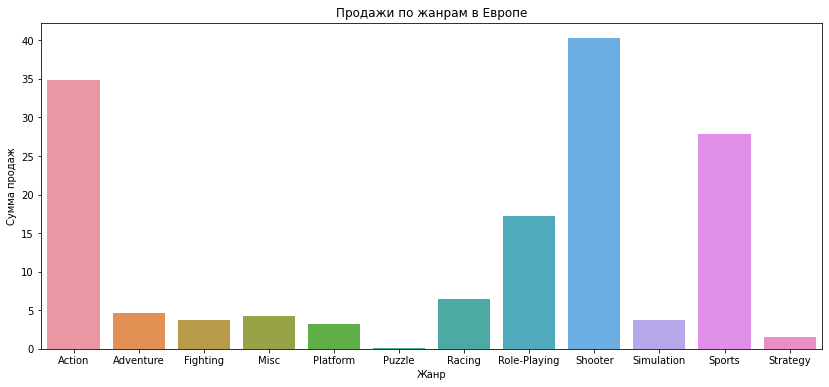

In [47]:
plt.figure(figsize=(14,6))
sns.barplot(x=r_genre.index, y=r_genre['eu_sales'])
plt.title('Продажи по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж');

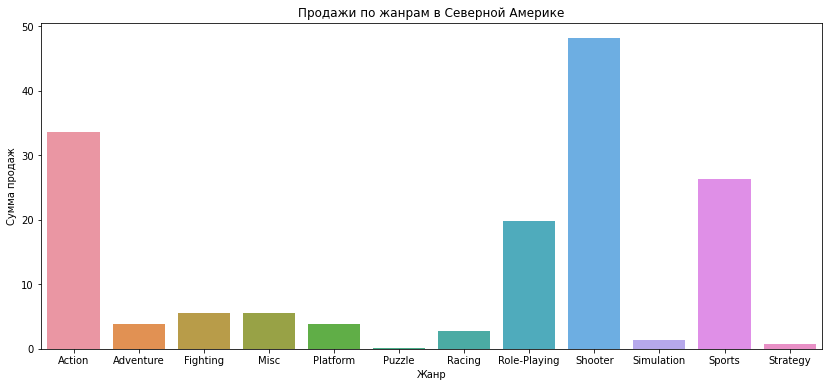

In [48]:
plt.figure(figsize=(14,6))
sns.barplot(x=r_genre.index, y=r_genre['na_sales'])
plt.title('Продажи по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж');

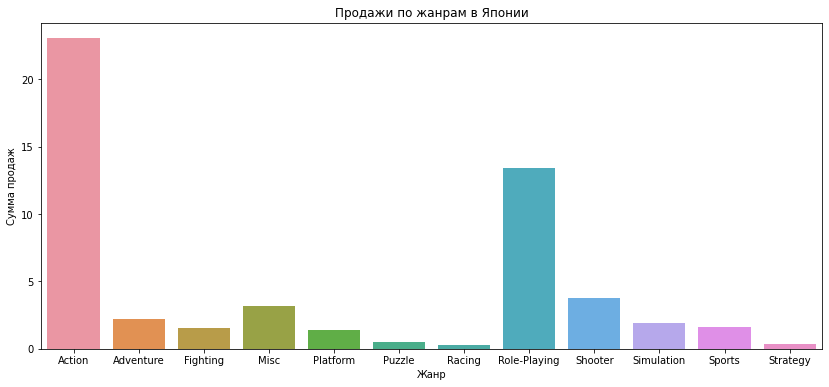

In [49]:
plt.figure(figsize=(14,6))
sns.barplot(x=r_genre.index, y=r_genre['jp_sales'])
plt.title('Продажи по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж');

In [50]:
print('Топ 5 популярных жанров в Европе:', ', '.join(list(r_genre.sort_values(by='eu_sales', ascending=False)[:5].index)))
print('Топ 5 популярных жанров в Японии:', ', '.join(list(r_genre.sort_values(by='jp_sales', ascending=False)[:5].index)))
print('Топ 5 популярных жанров в Северной Америке:', ', '.join(list(r_genre.sort_values(by='na_sales', ascending=False)[:5].index)))

Топ 5 популярных жанров в Европе: Shooter, Action, Sports, Role-Playing, Racing
Топ 5 популярных жанров в Японии: Action, Role-Playing, Shooter, Misc, Adventure
Топ 5 популярных жанров в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc


Предпочитаемые жанры пользователей из Европы и Северной Америки идентичны: шутеры, экшен и спорт. В Японии также предпочитают экшен, но еще и жанр РПГ.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [51]:
rate = actual.pivot_table(index='rating', 
                            values=['na_sales', 'eu_sales', 'jp_sales'],
                            aggfunc='sum')

rate 

,eu_sales,jp_sales,na_sales
rating,,,
E,34.83,5.25,26.59
E10+,11.54,3.27,17.87
M,45.54,4.29,47.03
T,20.32,7.70,22.86


<AxesSubplot:xlabel='rating'>

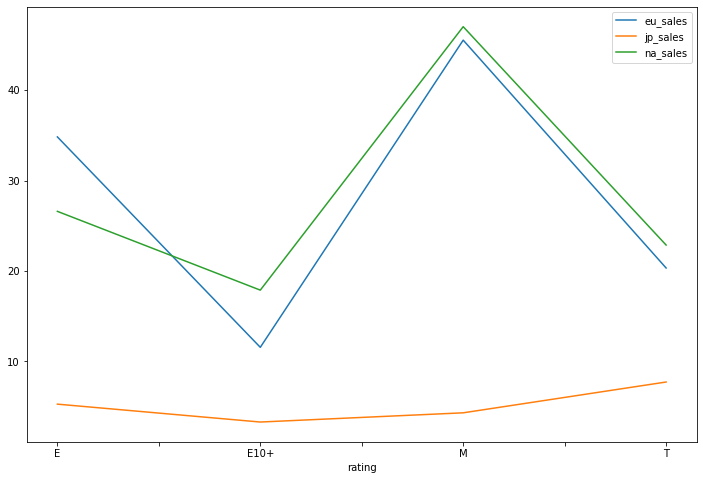

In [52]:
rate.plot(kind='line', figsize=(12,8))

В Европе и Северной Америке ситуация одинакова: больше всего продается игр с рейтингом М (но их и выпускается больше), меньше всего - E10+. В Японии игры E10+ также менее популярны, но больше продается игр с рейтингом T. Вероятно, это связано с популярностью жанров экшен и рпг в этих регионах, т.к. им преимущественно присваиваются такие рейтинги. 

Таким образом, пользователи из Европы и Северной Америки в своих предпочтениях очень схожи: они предпочитают одинаковые платформы (PS и Xbox разных поклолений и 3DS) и одинаковые жанры (экшн, шутеры и спорт). Преобладают игры рейтинга М. 
В Японии же консоли Xbox такой популярностью не пользуются, там отдается предпочтение 3DS и PS3/4/V. Наиболее популярный жанр - тоже Экшен, но есть и игры РПГ, которые в других регионах не так популярны. Преобладают игры рейтинга T.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H₁: Средние пользовательские рейтинги платформ Xbox One и PC отличаются;

In [53]:
x_one = actual.loc[actual['platform'] == "XOne", 'user_score'].dropna()
pc = actual.loc[actual['platform'] == "PC", 'user_score'].dropna()

alpha = .01

results = st.ttest_ind(
    x_one, 
    pc,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.2946308864003345
Не получилось отвергнуть нулевую гипотезу


In [54]:
x_one.mean()

6.54214876033058

In [55]:
pc.mean()

6.296428571428573

В результате теста гипотезу о равенстве рейтингов XOne и PC отвергнуть не получилось. Рейтинги не сильно отличаются между собой, чтобы эта разница была статистически значимой

### Средние пользовательские рейтинги жанров Action и Sports разные.

H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

H₁: Средние пользовательские рейтинги жанров Action и Sports разные;

In [56]:
action = actual.loc[actual['genre'] == "Action", 'user_score'].dropna()
sports = actual.loc[actual['genre'] == "Sports", 'user_score'].dropna()

alpha = .01

results = st.ttest_ind(
    action, 
    sports,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


In [57]:
action.mean()

6.8082901554404085

In [58]:
sports.mean()

5.1987804878048784

Средние рейтинги жанров экшн и спорт действительно сильно различаются: у игр жанра экшн он значительно выше 

## Общий вывод

В ходе работы мы сделали предобработку данных, проверили данные на дубликаты и пропуски. Выяснили, что пик продаж игр был в 2009/10 годах, после чего наблюдается спад, что связано как с экономическими, так и технологическими причинами. Выяснили, что срок жизни платформы составляет около 10 лет. За весь исследуемый период, в т.ч. выбранными нами как актуальный(с 2015 года), самые популярные платформы - консоли прозводства PS и XBox. Самый популярный жанр - Шутер.

Составили портреты пользователей.
- Популярные жанры и платформы Европы и Северной Америки практически идентичны. В топ входят платформы PS4, XOne, 3DS. В Европе так же покупают игры для ПК. Топ-5 жанров:  Shooter, Action, Sports, Role-Playing, Racing (в СА 5-е место занимает Misc. Большую долю составляют игры с рейтингом М(17+). 
- В Японии топ 5 составляют платформы отечественного производства: 3DS, PS3, PSV, PS4, WiiU. Xbox там не очень популярен. Топ-5 жанров: Action, Role-Playing, Shooter, Misc, Adventure. Большую долю составляют игры с рейтингом Т(13+). 

Проверили 2 гипотезы.
- гипотезу о равенстве пользовательских Xbox One и PC отверггнуть не удалось, разница между ними не значительна (6,5 и 6,2 соответственно)
- гипотезу о равенстве пользовательских рейтингов жанров Action и Sports отвергли, т.к. разница ощутима и игры жанра Экшн оцениваются пользователями выше (6,8 против 5,2)

Таким образом, можно сказать, что наиболее успешно будут продаваться игры, подходящие для платформ нового поколения (PS4 и Xone + PS3, пока осуществляется ее поддержка + 3DS), в жанрах Экшн, шутеры и РПГ с возрастным рейтингом 17+ или 13+. Корреляция между оценкой критиков и продажей игр не очень выражена, но она есть и значительно выше, чем между оценками пользователей и продажами, поэтому наличие таких оценок так же стоит учитывать при выборе игр для продажи. Игры для ПК так же не стоит игнорировать, т.к. может выпускается их значительно меньше,чем консольных игр, и популярны они только в одном из раматриваемых регионов, но пользователями они оцениваются также высоко. 